In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

random_state = 42

In [2]:
def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

course_1_bak_spec = read_dataset("../../data/datasets/1st_course_bak_spec.csv")
course_1_magistr = read_dataset("../../data/datasets/1st_course_magistr.csv")

subjects_bak_spec = read_dataset("../../data/datasets/subjects_bak_spec_v2.csv")
subjects_magistr = read_dataset("../../data/datasets/subjects_magistr_v2.csv")

In [3]:
X_c1_bak_spec = course_1_bak_spec.drop(columns=["Таргет"])
y_c1_bak_spec = course_1_bak_spec["Таргет"]

X_train_c1_bak_spec, X_test_c1_bak_spec, y_train_c1_bak_spec, y_test_c1_bak_spec = train_test_split(
    X_c1_bak_spec,
    y_c1_bak_spec,
    test_size=0.2,
    random_state=random_state
)

X_c1_magistr = course_1_magistr.drop(columns=["Таргет"])
y_c1_magistr = course_1_magistr["Таргет"]

X_train_c1_magistr, X_test_c1_magistr, y_train_c1_magistr, y_test_c1_magistr = train_test_split(
    X_c1_magistr,
    y_c1_magistr,
    test_size=0.2,
    random_state=random_state
)

X_s_bak_spec = subjects_bak_spec.drop(columns=["Таргет"])
y_s_bak_spec = subjects_bak_spec["Таргет"]

X_train_s_bak_spec, X_test_s_bak_spec, y_train_s_bak_spec, y_test_s_bak_spec = train_test_split(
    X_s_bak_spec,
    y_s_bak_spec,
    test_size=0.2,
    random_state=random_state
)

X_s_magistr = subjects_magistr.drop(columns=["Таргет"])
y_s_magistr = subjects_magistr["Таргет"]

X_train_s_magistr, X_test_s_magistr, y_train_s_magistr, y_test_s_magistr = train_test_split(
    X_s_magistr,
    y_s_magistr,
    test_size=0.2,
    random_state=random_state
)

Лучшая модель сохранена в best_model.pkl
{'clf': DecisionTreeClassifier(), 'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       117
           1       0.50      0.59      0.54        17

    accuracy                           0.87       134
   macro avg       0.72      0.75      0.73       134
weighted avg       0.88      0.87      0.88       134



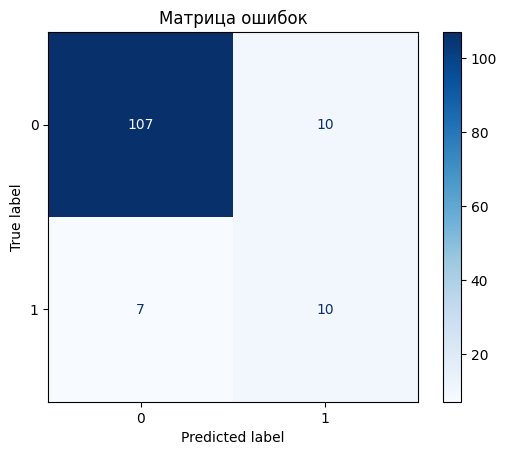

In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = [
    {
        'clf': [DecisionTreeClassifier()],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [2, 3, 5, 10, 20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        'clf__min_samples_split': [2, 5, 10, 12, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced']
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_s_magistr, y_train_s_magistr)

y_pred_s_magistr = grid_search.predict(X_test_s_magistr)

best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/dec_tree_model_magistr.pkl')

print("Лучшая модель сохранена в best_model.pkl")
print(grid_search.best_params_)
print("Лучшая модель:", grid_search.best_estimator_)
print("\nОтчёт классификации:\n", classification_report(y_test_s_magistr, y_pred_s_magistr))

cm = confusion_matrix(y_test_s_magistr, y_pred_s_magistr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.show()

In [5]:
clf = grid_search.best_estimator_

importances = clf.named_steps['clf'].feature_importances_

feature_importances = pd.DataFrame({
    'feature': X_train_s_magistr.columns,  
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importances)

                                            feature  importance
11                        Общее количество пересдач    0.337503
13                                 Рейтинг студента    0.203746
1                            Cумма баллов испытаний    0.158958
15                             fromSverdlovskRegion    0.034888
12                          Общее количество долгов    0.034257
37                            Код направления 1: 29    0.032476
39                             Код направления 3: 3    0.032315
0                                         Приоритет    0.028754
6                             Нуждается в общежитии    0.027965
9                  Полных лет на момент поступления    0.027201
35                            Код направления 1: 11    0.025526
5                                          Контракт    0.018840
10             Прошло лет с окончания уч. заведения    0.011739
16                          Human Development Index    0.009989
14                                 fromE

In [6]:
subjects_magistr.isna().sum()

Приоритет                                          0
Cумма баллов испытаний                             0
БВИ                                                0
Балл за инд. достижения                            0
Категория конкурса БВИ                             0
Контракт                                           0
Нуждается в общежитии                              0
Иностранный абитуриент (МОН)                       0
Таргет                                             0
Пол                                                0
Полных лет на момент поступления                   0
Прошло лет с окончания уч. заведения               0
Общее количество пересдач                          0
Общее количество долгов                            0
Рейтинг студента                                   0
fromEkaterinburg                                   0
fromSverdlovskRegion                               0
Human Development Index                            0
Особая квота                                  